# Recreate plots from Francis & Vavrus 2015: 
- Paper citation: Jennifer A Francis and Stephen J Vavrus 2015 Environ. Res. Lett. 10 014005
- Link to paper: https://iopscience.iop.org/article/10.1088/1748-9326/10/1/014005#erl507077bib8

## Plot 1: Annual-mean anomalies in air temperature for 40–80°N (recreating figure 1a from Francis & Vavrus)
- "Annual anomaly" is defined as the difference in annual mean relative to the **1989-2018 mean** (30 years)
    - Note that this is updated from Francis & Vavrus' available data from 1981–2010 (30 years)
- Anomalies in air temperature are calculated for each year from **2003 through 2021** (19 years) and averaged to get annual-mean anomalies which are plotted by latitude and elevation. 
    - Note that this is updated from Francis & Vavrus' anomalies calculatued for 1995 through 2013 (19 years).
- Thus, all data ranges have been shifted forward 8 years

In [1]:
import xarray as xr
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

### Read in pre-computed annual means from local net cdf files
#### Recall the reference code was included in section "CFSR_data" above

In [4]:
# Define the parent dir where annual temp data lives
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'

# Define the years of data to read in. As discussed above, we will read in 2002 through 2021
years_calc = range(2003, 2022)
years_relative = range(1989, 2019)

In [13]:
f"{dir_annual_t}annual_t_{year}.nc"

'/home11/grad/2021/cs436778/general-circulation/project/data/annual/annual_t_2022.nc'

In [5]:
# List all files from parent dir with the years defined
t_files_years_calc = []
for year in years_calc: 
    t_files_years_calc.append(f"{dir_annual_t}annual_t_{year}.nc")
    
# List all files from parent dir with the years defined
t_files_years_relative = []
for year in years_relative: 
    t_files_years_relative.append(f"{dir_annual_t}annual_t_{year}.nc")

In [6]:
# Read in datasets using dask

ds_years_calc = xr.open_mfdataset(t_files_years_calc, chunks={'time':30*4, 'lev': 4}, parallel=True)
ds_years_relative = xr.open_mfdataset(t_files_years_relative, chunks={'time':30*4, 'lev': 4}, parallel=True)

In [7]:
ds_years_calc

,Array,Chunk
Bytes,857.38 kiB,5.64 kiB
Shape,"(32, 361, 19)","(4, 361, 1)"
Count,39 Graph Layers,152 Chunks
Type,float32,numpy.ndarray


In [ ]:
ds_years_calc['t'].shape()


In [6]:
ds_years_relative

,Array,Chunk
Bytes,1.32 MiB,5.64 kiB
Shape,"(32, 361, 30)","(4, 361, 1)"
Count,61 Graph Layers,240 Chunks
Type,float32,numpy.ndarray


#### Calculate mean temp 1989 - 2018 to be used as relative temp in anomaly calculation


In [7]:
t_rel = ds_years_relative.mean(dim=('year'))

t_rel

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate mean temp for 2003 - 2021
- Note: It's more intuitive to think about the "annual mean anomalies" by finding each year's (from 2003 to 2021) temp anomaly and then averaging, but calculation-wise, it's equivalent (and simpler) to find the 2003-2021 mean temperature and subtracting from the 1989-2018 relative mean. 

In [8]:
t_calc = ds_years_calc.mean(dim=('year'))

t_calc

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate the annual-mean anomalies in air temperature by subtracting the two mean datasets created above

In [9]:
t_anom = t_calc - t_rel

#### Subset anomaly dataset to latitudes of interest: 40N - 80N

In [10]:
t_anom = t_anom.sel(lat=slice(40,80))

#### Plot annual-mean temperature anomalies 
- Reformat into a data array for easy plotting

In [11]:
t_anom_da = t_anom.to_array(dim='t').squeeze(dim=["t"], drop = True)

In [12]:
t_anom_da

<xarray.DataArray (lev: 32, lat: 81)>
dask.array<getitem, shape=(32, 81), dtype=float32, chunksize=(4, 81), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 40.0 40.5 41.0 41.5 42.0 ... 78.0 78.5 79.0 79.5 80.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0

In [18]:
# import numpy as np
# levs = np.arange(-0.50, 1.0, 0.1)
# levs

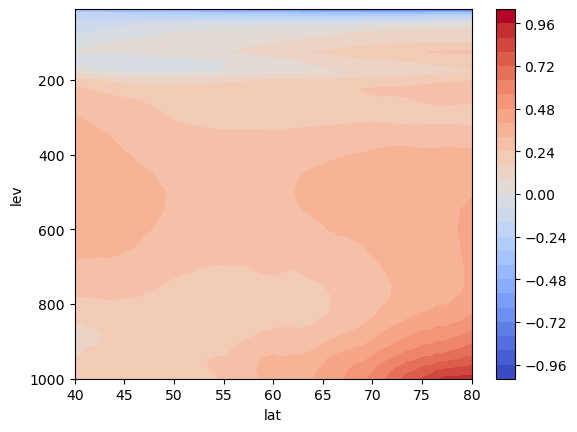

In [17]:
xr.plot.contourf(t_anom_da, x = 'lat', y = 'lev', levels = 30, yincrease=False, cmap = 'coolwarm')

# Plot 2: Arctic amplification seasonal time series
- Arctic Amplification defined as the difference in 1000 hPa temperature anomalies (relative to 1979–2021 mean), between the Arctic (70–90°N) and mid-latitudes (30–60°N)
    - Note that this is updated from Francis & Vavrus' available data from 1948–2013 mean

- Q: need seasonal climatologies or just the seasonal means by year?

##### ... if need (don't think I do, will just average for now, maybe go back and add weights later)
##### Read in pre-computed 30-year climatologies from local net cdf files
##### Source notebook used for computing these means: UAlbany ATM622 computing-seasonal.ipynb

### Read in pre-computed annual means from local net cdf files
#### Recall the reference code was included in section "CFSR_data" above

In [109]:
# Define the parent dir where annual temp data lives
dir_seasonal_t = '/home11/grad/2021/cs436778/general-circulation/project/data/seasonal/'
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'
dir_monthly_t = '/home11/grad/2021/cs436778/general-circulation/project/data/monthly/'

# Define the years of data to read in. As discussed above, we will read in 2002 through 2021
years = range(1979,2022)

leap = ['1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']


In [3]:
# # List all files from parent dir with the years defined
# t_files_years_seasonal = []
# for year in years: 
#     t_files_years_seasonal.append(f"{dir_seasonal_t}seasonal_t_{year}.nc")
    
# t_files_years_annual = []
# for year in years: 
#     t_files_years_annual.append(f"{dir_annual_t}annual_t_{year}.nc")


Pseudo code for one year (x axis): 
- Subset datasets by 30-60 and 70-90 lat (slice) and also subset lev = 1000
- Calculate weights so when do avg over 30-60N lat, it's weighted appropriately (see HW1)
- Will get two numbers, one for 30-60 and one for 70-90
- Then subtract relative mean...

Need to calc the relative mean so that we can subtract to get anomaly, so do the same steps above but for the 1979-2021 climatology, so first need to make the climatology (i.e. *one* averaged value) before being able to repeat steps 1-3, first need to average out the "year" component. 
- For annual datasets we can just do openmfdataset and mean over the years 
- But for seasonal datasets, didn't add a year component, so will either need to add a year coordinate so that the datasets can all be openend ("concatenated" together) with mfdataset, OR can just calculate for each and append it to list. Trying this second way first since maybe will have lists any way for the other stuff 

OLD
- This will work ok for annual datasets bc the datasets can be appended ok in openmfdataset, but for seasonal we just have a bunch of datasets all w DJF, JJA, etc. Nothing to differentiate datsets from each other and so they cant be concatinated. I should have included a year dimension to those seasonal datasets!! But didn't and so now what will need to do is maybe add that dimension to each ds and resave, but just make sure code for saving out seasonals works.
- Add the additional year as a dimension THEN can concat datasets

In [4]:
# ds_years_seasonal0 = xr.open_mfdataset(t_files_years_seasonal[0])#, chunks={'time':30*4, 'lev': 4}, parallel=True)
# ds_years_seasonal1 = xr.open_mfdataset(t_files_years_seasonal[1])#, chunks={'time':30*4, 'lev': 4}, parallel=True)
# ds_years_annual1 = xr.open_mfdataset(t_files_years_annual[1])#, chunks={'time':30*4, 'lev': 4}, parallel=True)


In [5]:
# ds_years_seasonal0

In [6]:
# # Define subset logic and slices
# lat_midlat = slice(30,60)
# lat_arctic = slice(70,90)
# elev_p = 1000

In [7]:
# ds_year_seasonal = ds_years_seasonal0
# midlat = ds_year_seasonal.t.sel(lev=elev_p, lat = lat_midlat)
# arctic =  ds_year_seasonal.t.sel(lev=elev_p, lat = lat_arctic)
# weights_midlat = np.cos(np.deg2rad(midlat.lat))
# weights_arctic = np.cos(np.deg2rad(arctic.lat))
# midlat_mean = midlat.weighted(weights_midlat).mean(dim = 'lat')
# arctic_mean = arctic.weighted(weights_arctic).mean(dim = 'lat')


In [9]:
f = xr.open_mfdataset("/home11/grad/2021/cs436778/general-circulation/project/data/monthly/monthly_t_1992.nc")
f

<xarray.Dataset>
Dimensions:  (lat: 361, lev: 32, month: 12)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t        (lev, lat, month) float32 dask.array<chunksize=(32, 361, 12), meta=np.ndarray>

In [16]:
f = range(1,13)
# for i in range(0, 2
for i in f:
    print (i)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
# midlat_mean

In [65]:
def latrange_mean(dataset, elev_p, latrange):
    """ 
    For each year, read in the seasonal dataset and subset by elevation and latitude range (ex: arctic and mid latitudes)
    Calculate the latitude-weighted mean temperature for each season
    """
    latrange = dataset.t.sel(lev=elev_p, lat = latrange)
    latrange_weights = np.cos(np.deg2rad(latrange.lat))
    latrange_mean = latrange.weighted(latrange_weights).mean(dim = 'lat')
    return latrange_mean

def add_to_dict(dict_name, key_name, val):
    """ Append a value to a key in a dictionary if the key already exists
    Otherwise, if key doesn’t exist in dict yet, add a new key and its value to the dictionary 
    """
    if key_name in dict_name:
        if type(dict_name[key_name]) is not list:
            key_current_val = [dict_name[key_name]]
        else:
            key_current_val = dict_name[key_name]
        key_current_val.append(val)
        dict_name[key_name] = key_current_val
    else:
        dict_name[key_name] = val    

def yearly_season_means(dataset, dict_name):
    """
    For each season, track the year, season, and mean value (three keys)
    Returns a dictionary of the tracked data 
    """
    for season in ['DJF', 'JJA', 'MAM', 'SON']:
        season_val = dataset.sel(season = season).values.item()
        add_to_dict(dict_name, season, season_val)
        
def yearly_monthly_means(dataset, dict_name):
    """
    For each season, track the year, season, and mean value (three keys)
    Returns a dictionary of the tracked data 
    """
    for month_num in range(1,13):
        month_val = dataset.sel(month = month_num).values.item()
        add_to_dict(dict_name, month_num, month_val)
        
def year_month_length(yr):
    if yr in leap:
        add_to_dict(arctic_dict, 'c2', 29)
        add_to_dict(midlat_dict, 'c2', 29)
        add_to_dict(arctic_dict, 'cyear', 366)
        add_to_dict(midlat_dict, 'cyear', 366)
    else: 
        add_to_dict(arctic_dict, 'c2', 28)
        add_to_dict(midlat_dict, 'c2', 28)
        add_to_dict(arctic_dict, 'cyear', 365)
        add_to_dict(midlat_dict, 'cyear', 365)
    add_to_dict(arctic_dict, 'c1', 31)
    add_to_dict(midlat_dict, 'c1', 31)
    add_to_dict(arctic_dict, 'c3', 31)
    add_to_dict(midlat_dict, 'c3', 31)
    add_to_dict(arctic_dict, 'c4', 30)
    add_to_dict(midlat_dict, 'c4', 30)
    add_to_dict(arctic_dict, 'c5', 31)
    add_to_dict(midlat_dict, 'c5', 31)
    add_to_dict(arctic_dict, 'c6', 30)
    add_to_dict(midlat_dict, 'c6', 30)
    add_to_dict(arctic_dict, 'c7', 31)
    add_to_dict(midlat_dict, 'c7', 31)
    add_to_dict(arctic_dict, 'c8', 31)
    add_to_dict(midlat_dict, 'c8', 31)
    add_to_dict(arctic_dict, 'c9', 30)
    add_to_dict(midlat_dict, 'c9', 30)
    add_to_dict(arctic_dict, 'c10', 31)
    add_to_dict(midlat_dict, 'c10', 31)
    add_to_dict(arctic_dict, 'c11', 30)
    add_to_dict(midlat_dict, 'c11', 30)
    add_to_dict(arctic_dict, 'c12', 31)
    add_to_dict(midlat_dict, 'c12', 31)

In [14]:
dir_seasonal_t

'/home11/grad/2021/cs436778/general-circulation/project/data/seasonal/'

In [6]:
ds_year

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361, year: 1)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * year     (year) int64 2021
Data variables:
    t        (lev, lat, year) float32 dask.array<chunksize=(32, 361, 1), meta=np.ndarray>

In [66]:
# create dictionaries which averages will be appended to
midlat_dict = {}
arctic_dict = {}

# Add seasonal data for each year from 1979-2021 
for year in range(1979,2022):
    """ 
    Open dataset for each year
    """
    year = str(year)
    
    # add year
    add_to_dict(midlat_dict, 'year_name', year)
    add_to_dict(arctic_dict, 'year_name', year)
                  
    # open dataset
    ds_year = xr.open_mfdataset(f"{dir_annual_t}annual_t_{year}.nc")
    ds_year_month = xr.open_mfdataset(f"{dir_monthly_t}monthly_t_{year}.nc")

    # middle latitudes - annual
    midlat_mean_year = latrange_mean(ds_year, 1000, slice(30,60))
    add_to_dict(midlat_dict, 'annual', midlat_mean_year.values.item())
    # middle latitudes - seasonal
    midlat_mean_month = latrange_mean(ds_year_month, 1000, slice(30,60))
    yearly_monthly_means(midlat_mean_month, midlat_dict)

    # arctic - annual
    arctic_mean_year = latrange_mean(ds_year, 1000, slice(70,90))
    add_to_dict(arctic_dict, 'annual', arctic_mean_year.values.item())
    # arctic - seasonal
    arctic_mean_month = latrange_mean(ds_year_month, 1000, slice(70,90))
    yearly_monthly_means(arctic_mean_month, arctic_dict)
    
    # add fields for ct_feb and ct_yr depending if leap year. Used in averaging
    year_month_length(year)



In [67]:
arctic_dict.keys() # note that the keys are numbers for months

dict_keys(['year_name', 'annual', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'c2', 'cyear', 'c1', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12'])

In [35]:
midlat_mean_year.values.item()

285.98968505859375

In [54]:
months_leap = [31,28,31,30,31,30,31,31,30,31,30,31]

nonleap = []
for year in range(1979,2022):
    year = str(year)
    nonleap.append(year)

type(nonleap)
type(leap)
# normal = [a - b for a, b in zip(nonleap, leap)]
normal = [x for x in nonleap if x not in leap]
months_normal = [31,29,31,30,31,30,31,31,30,31,30,31]

# normal


In [63]:
l1 = arctic_dict[1]
l2 = arctic_dict[2]
l3 = l1+l2
print(len(l1))
print(len(l2))
print(len(l3))

43
43
86


In [122]:
# calculate averages from monthly data (average across years) - need this for relative for anom calc

# seasonally
arctic_jfm_tomean = arctic_dict[1] + arctic_dict[2] + arctic_dict[3]
arctic_jfm_weights = arctic_dict['c1'] + arctic_dict['c2'] + arctic_dict['c3']
arctic_jfm= np.average(arctic_jfm_tomean, weights = arctic_jfm_weights)

arctic_amj_tomean = arctic_dict[4] + arctic_dict[5] + arctic_dict[6]
arctic_amj_weights = arctic_dict['c4'] + arctic_dict['c5'] + arctic_dict['c6']
arctic_amj= np.average(arctic_amj_tomean, weights = arctic_amj_weights)

arctic_jas_tomean = arctic_dict[7] + arctic_dict[8] + arctic_dict[9]
arctic_jas_weights = arctic_dict['c7'] + arctic_dict['c8'] + arctic_dict['c9']
arctic_jas= np.average(arctic_jas_tomean, weights = arctic_jas_weights)

arctic_ond_tomean = arctic_dict[10] + arctic_dict[11] + arctic_dict[12]
arctic_ond_weights = arctic_dict['c10'] + arctic_dict['c11'] + arctic_dict['c12']
arctic_ond= np.average(arctic_ond_tomean, weights = arctic_ond_weights)

midlat_jfm_tomean = midlat_dict[1] + midlat_dict[2] + midlat_dict[3]
midlat_jfm_weights = midlat_dict['c1'] + midlat_dict['c2'] + midlat_dict['c3']
midlat_jfm= np.average(midlat_jfm_tomean, weights = midlat_jfm_weights)

midlat_amj_tomean = midlat_dict[4] + midlat_dict[5] + midlat_dict[6]
midlat_amj_weights = midlat_dict['c4'] + midlat_dict['c5'] + midlat_dict['c6']
midlat_amj= np.average(midlat_amj_tomean, weights = midlat_amj_weights)

midlat_jas_tomean = midlat_dict[7] + midlat_dict[8] + midlat_dict[9]
midlat_jas_weights = midlat_dict['c7'] + midlat_dict['c8'] + midlat_dict['c9']
midlat_jas= np.average(midlat_jas_tomean, weights = midlat_jas_weights)

midlat_ond_tomean = midlat_dict[10] + midlat_dict[11] + midlat_dict[12]
midlat_ond_weights = midlat_dict['c10'] + midlat_dict['c11'] + midlat_dict['c12']
midlat_ond= np.average(midlat_ond_tomean, weights = midlat_ond_weights)

# yearly
arctic_ann_tomean = arctic_jfm_tomean+arctic_amj_tomean+arctic_jas_tomean+arctic_ond_tomean
arctic_ann_weights = arctic_jfm_weights+arctic_amj_weights+arctic_jas_weights+arctic_ond_weights
arctic_ann= np.average(arctic_ann_tomean, weights = arctic_ann_weights)

midlat_ann_tomean = midlat_jfm_tomean+midlat_amj_tomean+midlat_jas_tomean+midlat_ond_tomean
midlat_ann_weights = midlat_jfm_weights+midlat_amj_weights+midlat_jas_weights+midlat_ond_weights
midlat_ann= np.average(midlat_ann_tomean, weights = midlat_ann_weights)


In [93]:
midlat_ond

282.15364164963773

In [86]:
arctic_dict['year_name'][3:6]

['1982', '1983', '1984']

In [123]:
# need seasonal by year
winter_arctic = []
spring_arctic = []
summer_arctic = []
fall_arctic = []
annual_arctic = []

winter_midlat = []
spring_midlat = []
summer_midlat = []
fall_midlat = []
annual_midlat = []

for i in range(0, len(arctic_dict['year_name'])):
    yr_jfm = np.average([arctic_dict[1][i], arctic_dict[2][i], arctic_dict[3][i]], weights = [arctic_dict['c1'][i], arctic_dict['c2'][i], arctic_dict['c3'][i]])
    winter_arctic.append(yr_jfm)
    yr_amj = np.average([arctic_dict[4][i], arctic_dict[5][i], arctic_dict[6][i]], weights = [arctic_dict['c4'][i], arctic_dict['c5'][i], arctic_dict['c6'][i]])
    spring_arctic.append(yr_amj)
    yr_jas = np.average([arctic_dict[7][i], arctic_dict[8][i], arctic_dict[9][i]], weights = [arctic_dict['c7'][i], arctic_dict['c8'][i], arctic_dict['c9'][i]])
    summer_arctic.append(yr_jas)
    yr_ond = np.average([arctic_dict[10][i], arctic_dict[11][i], arctic_dict[12][i]], weights = [arctic_dict['c10'][i], arctic_dict['c11'][i], arctic_dict['c12'][i]])
    fall_arctic.append(yr_ond)
    yr_jfm = np.average([midlat_dict[1][i], midlat_dict[2][i], midlat_dict[3][i]], weights = [midlat_dict['c1'][i], midlat_dict['c2'][i], midlat_dict['c3'][i]])
    winter_midlat.append(yr_jfm)
    yr_amj = np.average([midlat_dict[4][i], midlat_dict[5][i], midlat_dict[6][i]], weights = [midlat_dict['c4'][i], midlat_dict['c5'][i], midlat_dict['c6'][i]])
    spring_midlat.append(yr_amj)
    yr_jas = np.average([midlat_dict[7][i], midlat_dict[8][i], midlat_dict[9][i]], weights = [midlat_dict['c7'][i], midlat_dict['c8'][i], midlat_dict['c9'][i]])
    summer_midlat.append(yr_jas)
    yr_ond = np.average([midlat_dict[10][i], midlat_dict[11][i], midlat_dict[12][i]], weights = [midlat_dict['c10'][i], midlat_dict['c11'][i], midlat_dict['c12'][i]])
    fall_midlat.append(yr_ond)
    # annual NEED TO FIGURE OUT HOW TO SUM ACROSS COLUMNS (ROW-WISE) in DICTIONARY!
    yr_ann = np.average([arctic_dict[1][i], arctic_dict[2][i], arctic_dict[3][i], arctic_dict[4][i], 
                         arctic_dict[5][i], arctic_dict[6][i],arctic_dict[7][i], arctic_dict[8][i], 
                         arctic_dict[9][i],arctic_dict[10][i], arctic_dict[11][i], arctic_dict[12][i]], 
                        weights = [arctic_dict['c1'][i], arctic_dict['c2'][i], arctic_dict['c3'][i], 
                        arctic_dict['c4'][i], arctic_dict['c5'][i], arctic_dict['c6'][i], arctic_dict['c7'][i], arctic_dict['c8'][i], 
                        arctic_dict['c9'][i],arctic_dict['c10'][i], arctic_dict['c11'][i], arctic_dict['c12'][i]])
    annual_arctic.append(yr_ann)
    yr_ann = np.average([midlat_dict[1][i], midlat_dict[2][i], midlat_dict[3][i], midlat_dict[4][i], 
                         midlat_dict[5][i], midlat_dict[6][i],midlat_dict[7][i], midlat_dict[8][i], 
                         midlat_dict[9][i],midlat_dict[10][i], midlat_dict[11][i], midlat_dict[12][i]], 
                        weights = [midlat_dict['c1'][i], midlat_dict['c2'][i], midlat_dict['c3'][i], 
                        midlat_dict['c4'][i], midlat_dict['c5'][i], midlat_dict['c6'][i], midlat_dict['c7'][i], midlat_dict['c8'][i], 
                        midlat_dict['c9'][i],midlat_dict['c10'][i], midlat_dict['c11'][i], midlat_dict['c12'][i]])
    annual_midlat.append(yr_ann)
 

In [119]:
annual_midlat

[284.8839658972335,
 284.7962985012701,
 285.3252747418129,
 284.721635123475,
 285.04025276915667,
 284.64113862918373,
 284.6174121595409,
 284.93633255631954,
 284.95279708235233,
 285.1624079636537,
 285.2214493424925,
 285.4382250642123,
 285.21605860043877,
 284.8576985343558,
 284.75580017925944,
 285.22787676249465,
 285.321310717439,
 284.74426252854977,
 285.27766564774186,
 285.5414380217252,
 285.55421334880674,
 285.3828291762722,
 285.6097986508722,
 285.59088979224634,
 285.5253702242081,
 285.5816620373335,
 285.6917180309557,
 285.7328256267391,
 285.6638490441727,
 285.5939547012413,
 285.37877239070525,
 285.53162331777077,
 285.32180811215756,
 285.4068637701983,
 285.5101161172945,
 285.5748717425621,
 285.8351258160317,
 285.8091598260598,
 285.8624153032695,
 285.7180352197935,
 285.840093826921,
 285.886313850111,
 285.94552018675085]

In [55]:
arctic_djf_mean = np.mean(arctic_seasonal_dict['DJF'])
arctic_mam_mean = np.mean(arctic_seasonal_dict['MAM'])
arctic_jja_mean = np.mean(arctic_seasonal_dict['JJA'])
arctic_son_mean = np.mean(arctic_seasonal_dict['SON'])
arctic_annual_mean = np.mean(arctic_seasonal_dict['annual'])

midlat_djf_mean = np.mean(midlat_seasonal_dict['DJF'])
midlat_mam_mean = np.mean(midlat_seasonal_dict['MAM'])
midlat_jja_mean = np.mean(midlat_seasonal_dict['JJA'])
midlat_son_mean = np.mean(midlat_seasonal_dict['SON'])
midlat_annual_mean = np.mean(midlat_seasonal_dict['annual'])


In [124]:
anom_jfm_arctic = np.array([x - arctic_jfm for x in winter_arctic])
anom_jfm_midlat = np.array([x - midlat_jfm for x in winter_midlat])
winter = (anom_jfm_arctic - anom_jfm_midlat).tolist()

anom_amj_arctic = np.array([x - arctic_amj for x in spring_arctic])
anom_amj_midlat = np.array([x - midlat_amj for x in spring_midlat])
spring = (anom_amj_arctic - anom_amj_midlat).tolist()

anom_jas_arctic = np.array([x - arctic_jas for x in summer_arctic])
anom_jas_midlat = np.array([x - midlat_jas for x in summer_midlat])
summer = (anom_jas_arctic - anom_jas_midlat).tolist()

anom_ond_arctic = np.array([x - arctic_ond for x in winter_arctic])
anom_ond_midlat = np.array([x - midlat_ond for x in winter_midlat])
fall = (anom_ond_arctic - anom_ond_midlat).tolist()

anom_ann_arctic = np.array([x - arctic_ann for x in annual_arctic])
anom_ann_midlat = np.array([x - midlat_ann for x in annual_midlat])
annual = (anom_ann_arctic - anom_ann_midlat).tolist()


# anom_annual_arctic = np.array([x - arctic_annual_mean for x in arctic_seasonal_dict['annual']])
# anom_annual_midlat = np.array([x - midlat_annual_mean for x in midlat_seasonal_dict['annual']])
# annual = (anom_annual_arctic - anom_annual_midlat).tolist()

# years = arctic_seasonal_dict['year_name']

# print(len(years))
# print(len(winter))
# print(len(spring))
# print(len(summer))
# print(len(fall))
# print(len(annual))

In [108]:
arctic_dict.keys()

dict_keys(['year_name', 'annual', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'c2', 'cyear', 'c1', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12'])

In [57]:
print(len(annual))

43


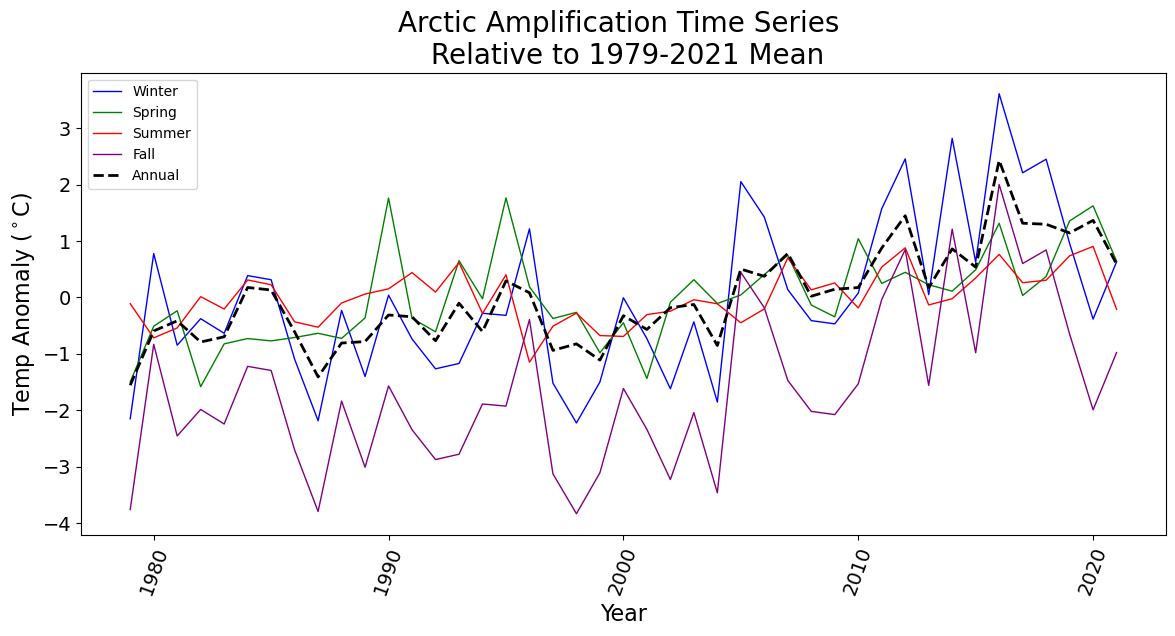

In [125]:

## Create figure of a particular size
fig = plt.figure(figsize=(14, 6))

## TS Karl
# add plots for TS Karl windspeed
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(years, winter, label='Winter', color='blue',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, spring, label='Spring', color='green',linewidth=1, markersize = 6) # , marker='o'
ax1.plot(years, summer, label='Summer', color='red',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, fall, label='Fall', color='purple',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, annual, label='Annual', color='black',linewidth=2, linestyle='--', markersize = 6) #, marker='o'


ax1.set_title('Arctic Amplification Time Series \n Relative to 1979-2021 Mean', size = 20)
ax1.set_xlabel('Year', size = 16)
ax1.set_ylabel('Temp Anomaly ($^\circ$C)', size = 16)
ax1.tick_params(axis='x', labelrotation = 70, labelsize=14)
ax1.tick_params(axis='y',  labelsize=14)

ax1.legend(loc='upper left')

In [59]:
2_2

22

In [64]:
y = xr.open_mfdataset('/roselab_rit/data/cfsr_climatology/t.seas_clim.0p5.nc')

In [65]:
y

<xarray.Dataset>
Dimensions:  (season: 4, lev: 32, lat: 361, lon: 720)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    t        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 32, 361, 720), meta=np.ndarray>